In [36]:
import pandas as pd

import matplotlib.pyplot as plt
# plt.style.use('seaborn-whitegrid')
plt.rcParams['figure.figsize'] = (16, 6)

In [2]:
with open('dly1823.csv') as f:
    lines = f.readlines()

In [7]:
list(enumerate(lines))[:10]

[(0, 'Station Name: DUBLIN (Glasnevin)\n'),
 (1, 'Station Height: 18 M \n'),
 (2, 'Latitude:53.370  ,Longitude: -6.270\n'),
 (3, '\n'),
 (4, '\n'),
 (5, 'date: -   09 to 09 utc\n'),
 (6, 'rain: -   Precipitation Amount (mm)\n'),
 (7, 'maxt: -   Maximum Temperature (C)\n'),
 (8, 'mint: -   Minimum Temperature (C)\n'),
 (9, 'gmin: -   09utc Grass Minimum Temperature (C)\n')]

In [3]:
df = pd.read_csv('dly1823.csv', header=0, skiprows=12)['date rain maxt mint'.split()]
df['date'] = pd.to_datetime(df.date, format='%d-%b-%Y')  
df.set_index('date', inplace=True)
df.head()

,rain,maxt,mint
date,,,
1941-01-01,2.4,,
1941-01-02,0.9,,
1941-01-03,0.0,,
1941-01-04,0.0,,
1941-01-05,0.0,,


<Axes: xlabel='date'>

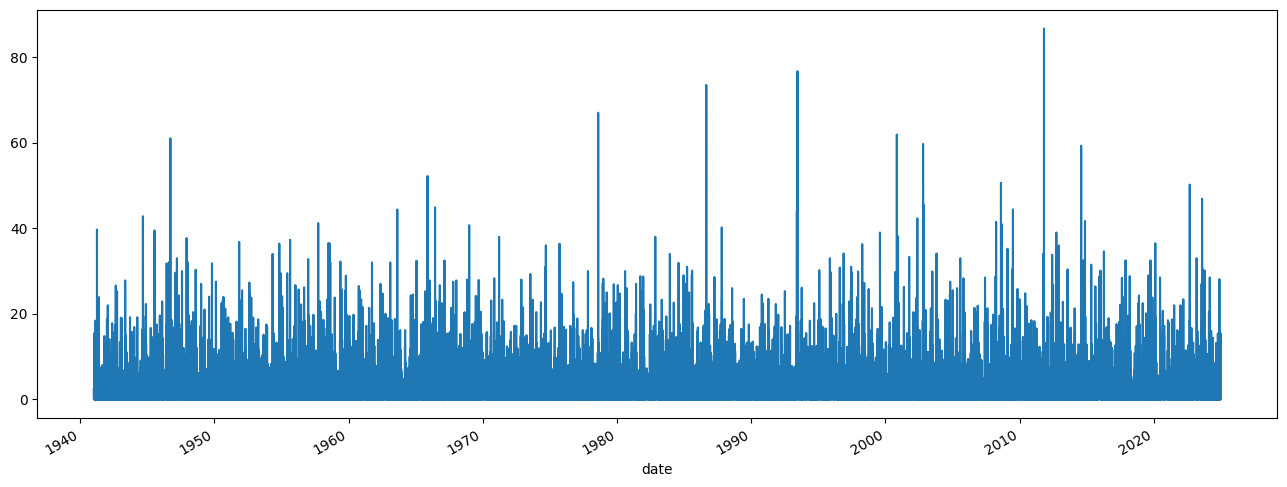

In [ ]:
df['rain'].plot()

In [18]:
# Only include rows where maxt is not missing:
max_t_rows = df[(df.maxt!=' ') & (df.mint!=' ')]
max_t_rows['maxt'] = max_t_rows.maxt.astype(float)
max_t_rows['mint'] = max_t_rows.mint.astype(float)
max_t_rows.head()

/tmp/ipykernel_68889/1107488554.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  max_t_rows['maxt'] = max_t_rows.maxt.astype(float)
/tmp/ipykernel_68889/1107488554.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  max_t_rows['mint'] = max_t_rows.mint.astype(float)


,rain,maxt,mint
date,,,
1961-01-01,0.2,9.5,3.7
1961-01-02,5.1,7.2,4.2
1961-01-03,0.4,5.5,0.5
1961-01-04,0.2,5.6,0.4
1961-01-05,10.4,7.2,-1.5


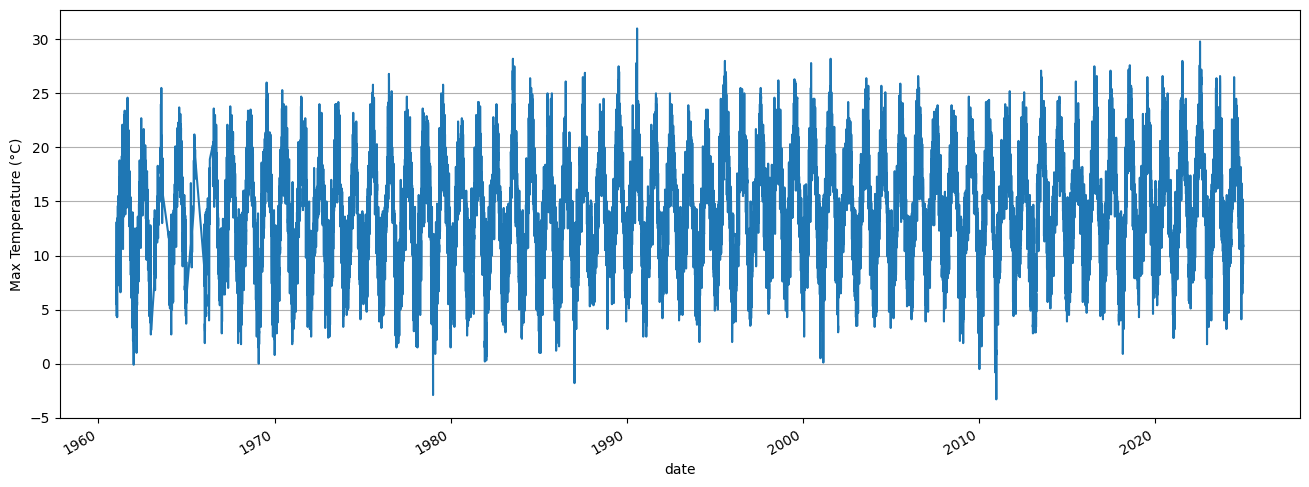

In [33]:
max_t_rows['maxt'].plot()
plt.ylabel('Max Temperature (°C)')
plt.grid(axis='y')
plt.show()

In [16]:
monthly_means = max_t_rows.maxt.resample('ME').mean()
yearly_means = max_t_rows.maxt.resample('YE').mean()


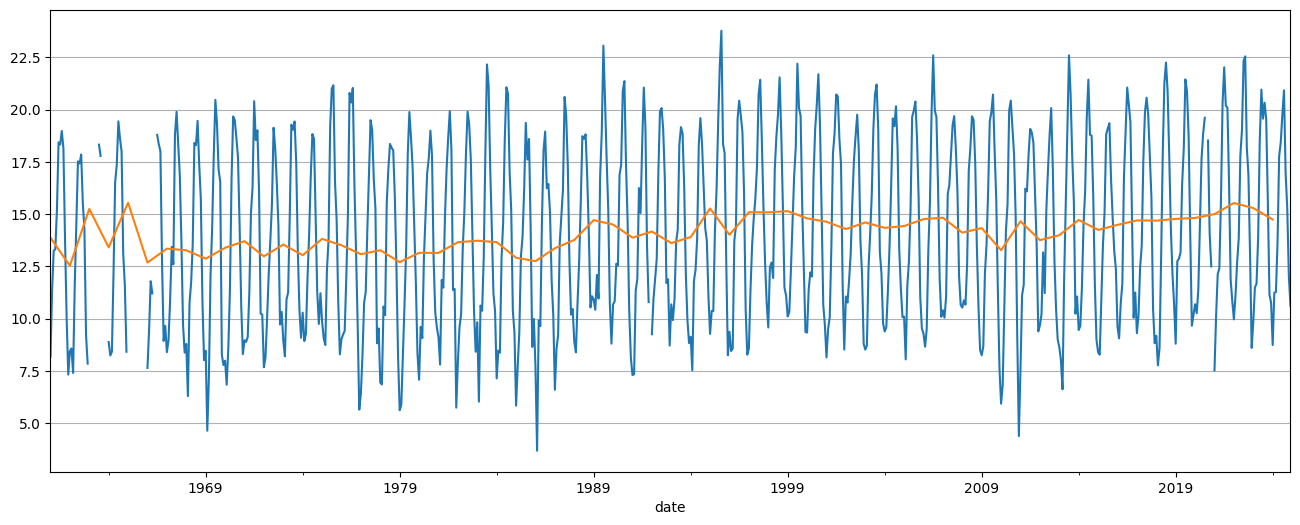

In [17]:
fig, ax = plt.subplots(1, 1, figsize=(16, 6))

monthly_means.plot(ax=ax)
yearly_means.plot(ax=ax)
plt.grid(axis='y')
plt.show()

In [5]:
# fit a linreg to max_t_rows['maxt']

import statsmodels.api as sm

max_t_rows = max_t_rows.sort_index()

In [20]:
max_t_rows = max_t_rows.reset_index()
max_t_rows = max_t_rows.reset_index()

In [21]:
max_t_rows

,index,date,rain,maxt,mint
0,0,1961-01-01,0.2,9.5,3.7
1,1,1961-01-02,5.1,7.2,4.2
2,2,1961-01-03,0.4,5.5,0.5
3,3,1961-01-04,0.2,5.6,0.4
4,4,1961-01-05,10.4,7.2,-1.5
...,...,...,...,...,...
22596,22596,2024-12-27,0.0,11.4,7.7
22597,22597,2024-12-28,0.0,11.0,7.7
22598,22598,2024-12-29,0.0,10.8,7.9
22599,22599,2024-12-30,0.8,11.3,8.8


In [50]:
results = sm.OLS(endog=max_t_rows['maxt'], exog=sm.add_constant(max_t_rows.index)).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   maxt   R-squared:                       0.013
Model:                            OLS   Adj. R-squared:                  0.013
Method:                 Least Squares   F-statistic:                     303.5
Date:                Fri, 21 Mar 2025   Prob (F-statistic):           1.59e-67
Time:                        16:31:48   Log-Likelihood:                -68291.
No. Observations:               22656   AIC:                         1.366e+05
Df Residuals:                   22654   BIC:                         1.366e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.0288      0.066    198.891      0.000      12.900      13.157
x1          8.724e-05   5.01e-06     17.420      0.000    7.74e-05    9.71e-05
==============================================================================
Omnibus:                      837.454   Durbin-Watson:                   0.200
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              373.295
Skew:                          -0.031   Prob(JB):                     8.71e-82
Kurtosis:                       2.374   Cond. No.                     2.62e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.62e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [16]:
max_t_rows.dtypes

index             int64
date     datetime64[ns]
rain            float64
maxt            float64
mint             object
dtype: object

In [26]:
import statsmodels.formula.api as smf
results = smf.ols(formula='maxt ~ index + rain + rain*index', data=max_t_rows).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   maxt   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     116.5
Date:                Fri, 21 Mar 2025   Prob (F-statistic):           7.70e-75
Time:                        19:45:18   Log-Likelihood:                -68100.
No. Observations:               22601   AIC:                         1.362e+05
Df Residuals:                   22597   BIC:                         1.362e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     13.1528      0.073    181.218      0.000      13.011      13.295
index       8.625e-05   5.55e-06     15.549      0.000    7.54e-05    9.71e-05
rain          -0.0621      0.016     -3.809      0.000      -0.094      -0.030
rain:index  7.386e-07    1.2e-06      0.616      0.538   -1.61e-06    3.09e-06
==============================================================================
Omnibus:                      834.174   Durbin-Watson:                   0.204
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              373.952
Skew:                          -0.041   Prob(JB):                     6.27e-82
Kurtosis:                       2.375   Cond. No.                     1.43e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.43e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [27]:
results.params

Intercept     1.315277e+01
index         8.624695e-05
rain         -6.213975e-02
rain:index    7.385526e-07
dtype: float64

In [70]:
y = results.params['const'] + results.params['x1'] * max_t_rows.index

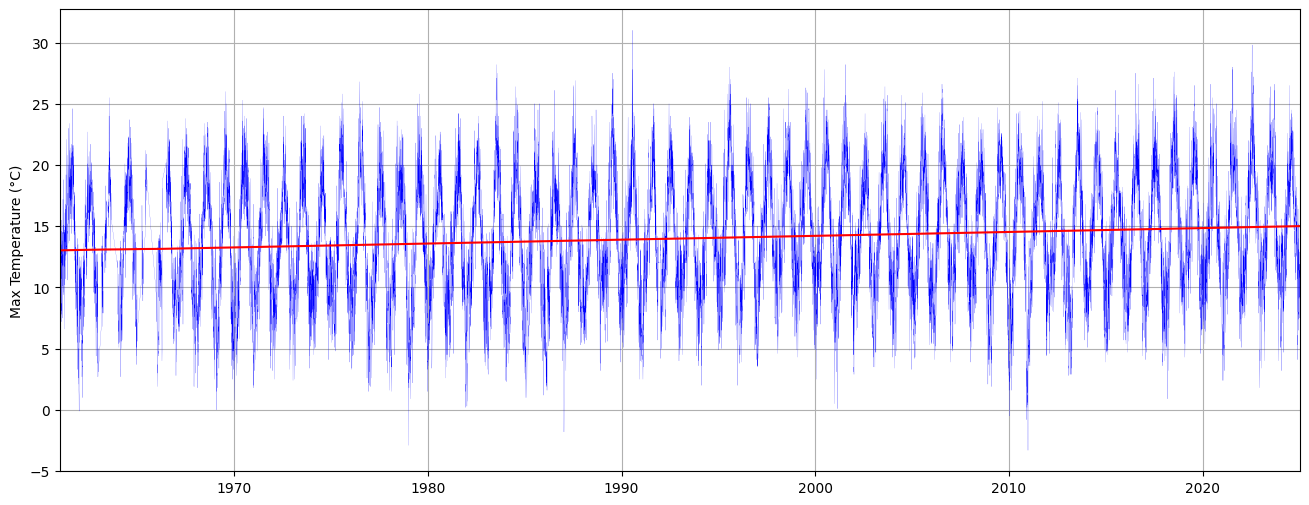

In [69]:
plt.plot(max_t_rows.date, max_t_rows['maxt'], c='b', linewidth=0.1)
plt.xlim(max_t_rows.date.min(), max_t_rows.date.max())
plt.ylabel('Max Temperature (°C)')
plt.grid(axis='both', which='both')
plt.plot(max_t_rows.date, y, c='r')
plt.show()


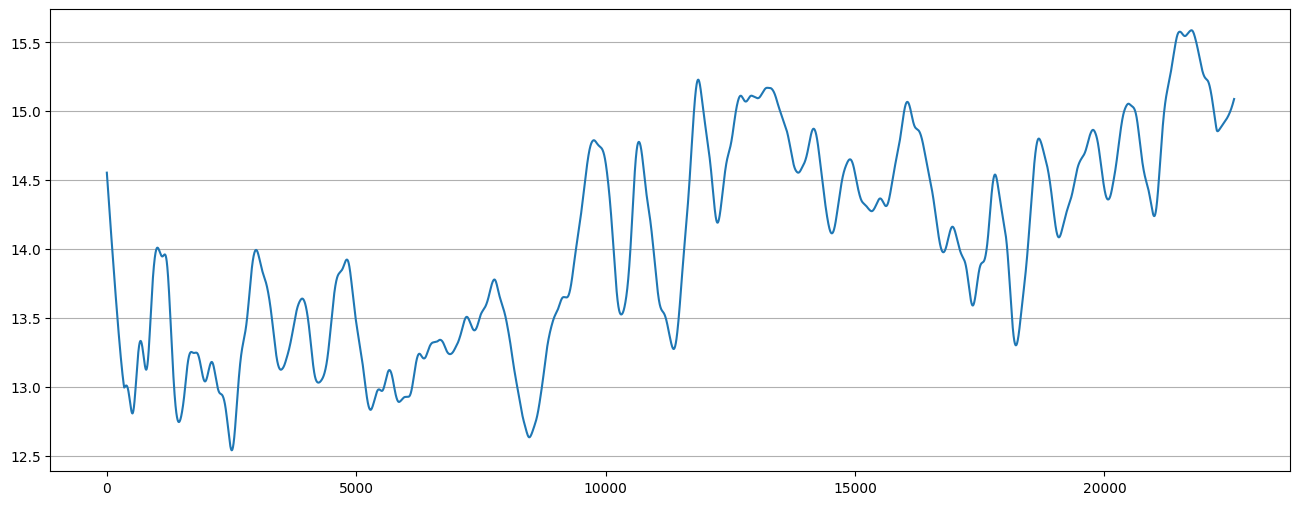

In [39]:
from statsmodels.tsa.seasonal import STL

stl = STL(max_t_rows['maxt'], period=365)
result = stl.fit()

result.trend.plot()
plt.grid(axis='y')